In [1]:
!git clone https://github.com/kishkath/ERA.git

Cloning into 'ERA'...
remote: Enumerating objects: 312, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 312 (delta 73), reused 13 (delta 4), pack-reused 155
Receiving objects: 100% (312/312), 2.06 MiB | 8.96 MiB/s, done.
Resolving deltas: 100% (142/142), done.


In [2]:
!pip install torchsummary

In [3]:
%cd /kaggle/working/ERA/9 - Advanced Convolutions & Augmentations

/kaggle/working/ERA/9 - Advanced Convolutions & Augmentations


In [2]:
!pwd

/kaggle/working


In [4]:
import os 
os.listdir("/kaggle/working/ERA/9 - Advanced Convolutions & Augmentations")

['models', 'README.md', 'utility']

In [20]:

from utility.dataset import loader # input batch-size & transforms if u create else proivde 'custom'
from utility.run import Performance,scores
from utility.visualize import Plots,plot_metrics
from models.S9_model import NetArch,return_summary
from utility.utils import allot_device
     

import torch
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
     

In [6]:
 # Setting up the device
device = allot_device(42)
print(f"{device} is available")

cuda is available


In [7]:
train_loader,test_loader = loader.load_data(128)
print(len(train_loader),len(test_loader))

100%|██████████| 170498071/170498071 [00:01<00:00, 106109863.66it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
391 79


<Figure size 640x480 with 0 Axes>

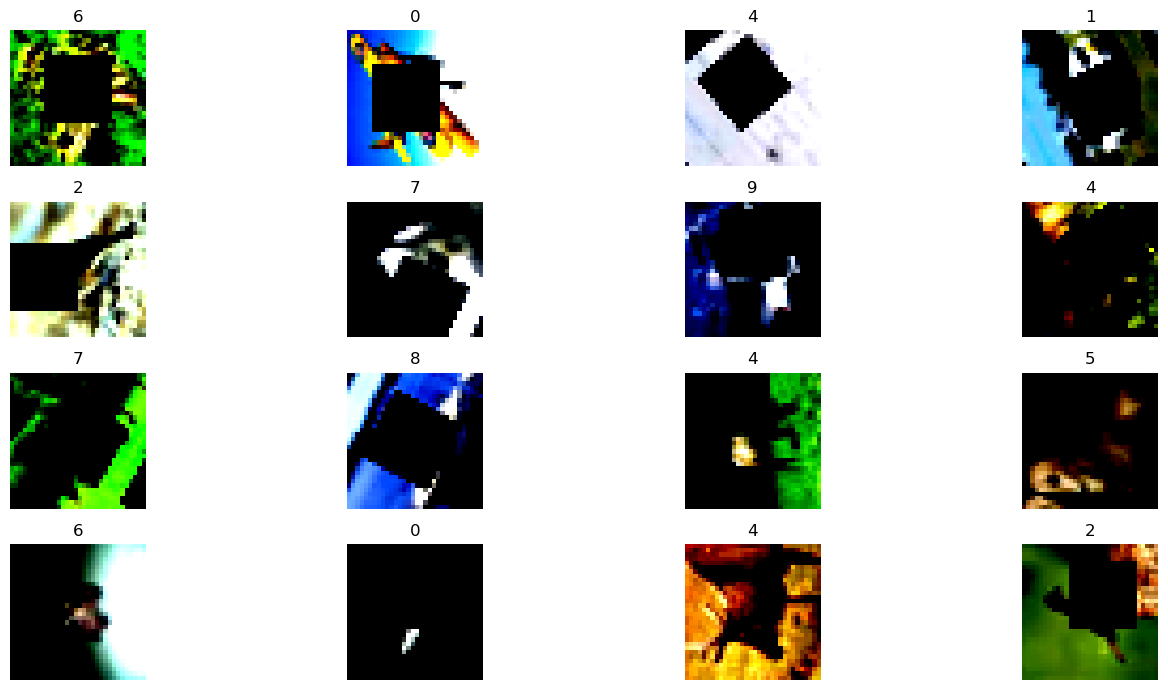

In [8]:
#train_data
Plots(None,17,train_loader).plot_images()

<Figure size 640x480 with 0 Axes>

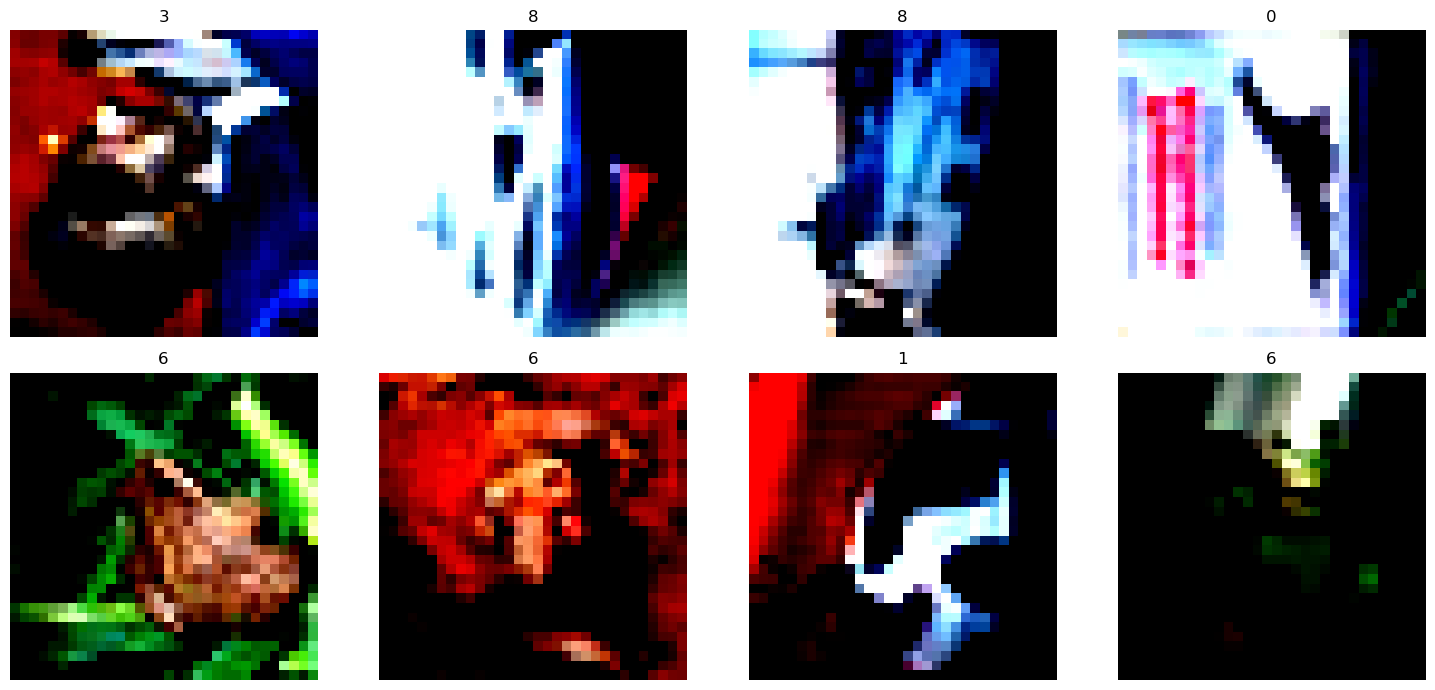

In [9]:
#test_data
Plots(None,9,test_loader).plot_images()

In [15]:
model = NetArch().to(device)
     
return_summary(model,device,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 32, 32]             560
       BatchNorm2d-2           [-1, 20, 32, 32]              40
              ReLU-3           [-1, 20, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]           5,792
       BatchNorm2d-5           [-1, 32, 32, 32]              64
              ReLU-6           [-1, 32, 32, 32]               0
            Conv2d-7           [-1, 64, 16, 16]          18,496
       BatchNorm2d-8           [-1, 64, 16, 16]             128
              ReLU-9           [-1, 64, 16, 16]               0
        Dropout2d-10           [-1, 64, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]          73,856
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 128,

In [16]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=18, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 72
perf = Performance(device,model,(train_loader,test_loader),optimizer,criterion,[False,0.01])

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  perf.train()
  perf.test()
#   scheduler.step()

Epoch 1


Train: Loss=1.5196 Batch_id=390 Accuracy=32.45: 100%|██████████| 391/391 [00:18<00:00, 20.71it/s]


Test set: Average loss: 0.0115, Accuracy: 4649/10000 (46.49%)

Epoch 2


Train: Loss=1.2246 Batch_id=390 Accuracy=44.94: 100%|██████████| 391/391 [00:17<00:00, 21.77it/s]


Test set: Average loss: 0.0098, Accuracy: 5416/10000 (54.16%)

Epoch 3


Train: Loss=1.5450 Batch_id=390 Accuracy=50.24: 100%|██████████| 391/391 [00:17<00:00, 21.79it/s]


Test set: Average loss: 0.0086, Accuracy: 6088/10000 (60.88%)

Epoch 4


Train: Loss=1.1769 Batch_id=390 Accuracy=54.21: 100%|██████████| 391/391 [00:18<00:00, 21.05it/s]


Test set: Average loss: 0.0081, Accuracy: 6337/10000 (63.37%)

Epoch 5


Train: Loss=1.1585 Batch_id=390 Accuracy=57.36: 100%|██████████| 391/391 [00:17<00:00, 21.91it/s]


Test set: Average loss: 0.0072, Accuracy: 6778/10000 (67.78%)

Epoch 6


Train: Loss=0.9986 Batch_id=390 Accuracy=59.79: 100%|██████████| 391/391 [00:17<00:00, 21.89it/s]


Test set: Average loss: 0.0065, Accuracy: 7105/10000 (71.05%)

Epoch 7


Train: Loss=1.0884 Batch_id=390 Accuracy=61.86: 100%|██████████| 391/391 [00:18<00:00, 21.07it/s]


Test set: Average loss: 0.0060, Accuracy: 7340/10000 (73.40%)

Epoch 8


Train: Loss=1.1200 Batch_id=390 Accuracy=63.21: 100%|██████████| 391/391 [00:17<00:00, 21.74it/s]


Test set: Average loss: 0.0061, Accuracy: 7313/10000 (73.13%)

Epoch 9


Train: Loss=1.0699 Batch_id=390 Accuracy=64.30: 100%|██████████| 391/391 [00:18<00:00, 21.70it/s]


Test set: Average loss: 0.0058, Accuracy: 7443/10000 (74.43%)

Epoch 10


Train: Loss=0.8376 Batch_id=390 Accuracy=65.93: 100%|██████████| 391/391 [00:19<00:00, 20.53it/s]


Test set: Average loss: 0.0056, Accuracy: 7597/10000 (75.97%)

Epoch 11


Train: Loss=0.9764 Batch_id=390 Accuracy=66.48: 100%|██████████| 391/391 [00:18<00:00, 21.58it/s]


Test set: Average loss: 0.0055, Accuracy: 7586/10000 (75.86%)

Epoch 12


Train: Loss=0.8361 Batch_id=390 Accuracy=67.32: 100%|██████████| 391/391 [00:18<00:00, 21.29it/s]


Test set: Average loss: 0.0054, Accuracy: 7672/10000 (76.72%)

Epoch 13


Train: Loss=1.0417 Batch_id=390 Accuracy=68.27: 100%|██████████| 391/391 [00:18<00:00, 21.19it/s]


Test set: Average loss: 0.0051, Accuracy: 7780/10000 (77.80%)

Epoch 14


Train: Loss=1.0533 Batch_id=390 Accuracy=68.90: 100%|██████████| 391/391 [00:18<00:00, 21.50it/s]


Test set: Average loss: 0.0049, Accuracy: 7864/10000 (78.64%)

Epoch 15


Train: Loss=0.8603 Batch_id=390 Accuracy=69.53: 100%|██████████| 391/391 [00:18<00:00, 21.63it/s]


Test set: Average loss: 0.0048, Accuracy: 7895/10000 (78.95%)

Epoch 16


Train: Loss=0.9006 Batch_id=390 Accuracy=70.02: 100%|██████████| 391/391 [00:18<00:00, 21.35it/s]


Test set: Average loss: 0.0047, Accuracy: 7965/10000 (79.65%)

Epoch 17


Train: Loss=0.9335 Batch_id=390 Accuracy=70.27: 100%|██████████| 391/391 [00:17<00:00, 22.44it/s]


Test set: Average loss: 0.0047, Accuracy: 7946/10000 (79.46%)

Epoch 18


Train: Loss=0.6992 Batch_id=390 Accuracy=70.83: 100%|██████████| 391/391 [00:17<00:00, 22.30it/s]


Test set: Average loss: 0.0044, Accuracy: 8093/10000 (80.93%)

Epoch 19


Train: Loss=0.8430 Batch_id=390 Accuracy=71.42: 100%|██████████| 391/391 [00:17<00:00, 22.09it/s]


Test set: Average loss: 0.0044, Accuracy: 8103/10000 (81.03%)

Epoch 20


Train: Loss=0.7455 Batch_id=390 Accuracy=71.89: 100%|██████████| 391/391 [00:17<00:00, 22.68it/s]


Test set: Average loss: 0.0043, Accuracy: 8170/10000 (81.70%)

Epoch 21


Train: Loss=0.8474 Batch_id=390 Accuracy=71.86: 100%|██████████| 391/391 [00:17<00:00, 22.07it/s]


Test set: Average loss: 0.0044, Accuracy: 8092/10000 (80.92%)

Epoch 22


Train: Loss=0.7913 Batch_id=390 Accuracy=72.71: 100%|██████████| 391/391 [00:17<00:00, 21.77it/s]


Test set: Average loss: 0.0043, Accuracy: 8154/10000 (81.54%)

Epoch 23


Train: Loss=0.8668 Batch_id=390 Accuracy=72.80: 100%|██████████| 391/391 [00:17<00:00, 22.28it/s]


Test set: Average loss: 0.0043, Accuracy: 8147/10000 (81.47%)

Epoch 24


Train: Loss=0.7734 Batch_id=390 Accuracy=73.04: 100%|██████████| 391/391 [00:18<00:00, 21.61it/s]


Test set: Average loss: 0.0041, Accuracy: 8233/10000 (82.33%)

Epoch 25


Train: Loss=0.7825 Batch_id=390 Accuracy=73.36: 100%|██████████| 391/391 [00:17<00:00, 21.76it/s]


Test set: Average loss: 0.0043, Accuracy: 8153/10000 (81.53%)

Epoch 26


Train: Loss=0.7467 Batch_id=390 Accuracy=73.70: 100%|██████████| 391/391 [00:17<00:00, 22.67it/s]


Test set: Average loss: 0.0041, Accuracy: 8223/10000 (82.23%)

Epoch 27


Train: Loss=0.5613 Batch_id=390 Accuracy=74.07: 100%|██████████| 391/391 [00:17<00:00, 21.77it/s]


Test set: Average loss: 0.0040, Accuracy: 8274/10000 (82.74%)

Epoch 28


Train: Loss=0.6500 Batch_id=390 Accuracy=74.09: 100%|██████████| 391/391 [00:17<00:00, 22.19it/s]


Test set: Average loss: 0.0042, Accuracy: 8188/10000 (81.88%)

Epoch 29


Train: Loss=0.5501 Batch_id=390 Accuracy=74.60: 100%|██████████| 391/391 [00:17<00:00, 22.92it/s]


Test set: Average loss: 0.0041, Accuracy: 8253/10000 (82.53%)

Epoch 30


Train: Loss=0.9672 Batch_id=390 Accuracy=74.79: 100%|██████████| 391/391 [00:17<00:00, 22.17it/s]


Test set: Average loss: 0.0041, Accuracy: 8265/10000 (82.65%)

Epoch 31


Train: Loss=0.5888 Batch_id=390 Accuracy=74.90: 100%|██████████| 391/391 [00:16<00:00, 23.03it/s]


Test set: Average loss: 0.0039, Accuracy: 8311/10000 (83.11%)

Epoch 32


Train: Loss=0.9077 Batch_id=390 Accuracy=74.99: 100%|██████████| 391/391 [00:17<00:00, 22.95it/s]


Test set: Average loss: 0.0040, Accuracy: 8308/10000 (83.08%)

Epoch 33


Train: Loss=0.7364 Batch_id=390 Accuracy=75.21: 100%|██████████| 391/391 [00:17<00:00, 21.84it/s]


Test set: Average loss: 0.0038, Accuracy: 8383/10000 (83.83%)

Epoch 34


Train: Loss=0.6026 Batch_id=390 Accuracy=75.51: 100%|██████████| 391/391 [00:17<00:00, 22.35it/s]


Test set: Average loss: 0.0037, Accuracy: 8416/10000 (84.16%)

Epoch 35


Train: Loss=0.8915 Batch_id=390 Accuracy=75.74: 100%|██████████| 391/391 [00:17<00:00, 22.37it/s]


Test set: Average loss: 0.0038, Accuracy: 8380/10000 (83.80%)

Epoch 36


Train: Loss=0.6520 Batch_id=390 Accuracy=75.70: 100%|██████████| 391/391 [00:17<00:00, 22.71it/s]


Test set: Average loss: 0.0038, Accuracy: 8402/10000 (84.02%)

Epoch 37


Train: Loss=1.0457 Batch_id=390 Accuracy=75.68: 100%|██████████| 391/391 [00:16<00:00, 23.10it/s]


Test set: Average loss: 0.0037, Accuracy: 8438/10000 (84.38%)

Epoch 38


Train: Loss=0.6912 Batch_id=390 Accuracy=76.36: 100%|██████████| 391/391 [00:17<00:00, 22.31it/s]


Test set: Average loss: 0.0039, Accuracy: 8308/10000 (83.08%)

Epoch 39


Train: Loss=0.6116 Batch_id=390 Accuracy=76.51: 100%|██████████| 391/391 [00:17<00:00, 22.76it/s]


Test set: Average loss: 0.0038, Accuracy: 8408/10000 (84.08%)

Epoch 40


Train: Loss=0.8393 Batch_id=390 Accuracy=76.49: 100%|██████████| 391/391 [00:17<00:00, 22.91it/s]


Test set: Average loss: 0.0038, Accuracy: 8346/10000 (83.46%)

Epoch 41


Train: Loss=0.7834 Batch_id=390 Accuracy=76.56: 100%|██████████| 391/391 [00:17<00:00, 21.90it/s]


Test set: Average loss: 0.0036, Accuracy: 8473/10000 (84.73%)

Epoch 42


Train: Loss=0.6546 Batch_id=390 Accuracy=76.73: 100%|██████████| 391/391 [00:17<00:00, 22.36it/s]


Test set: Average loss: 0.0038, Accuracy: 8447/10000 (84.47%)

Epoch 43


Train: Loss=0.5784 Batch_id=390 Accuracy=76.70: 100%|██████████| 391/391 [00:17<00:00, 22.33it/s]


Test set: Average loss: 0.0036, Accuracy: 8474/10000 (84.74%)

Epoch 44


Train: Loss=0.6518 Batch_id=390 Accuracy=76.87: 100%|██████████| 391/391 [00:17<00:00, 21.87it/s]


Test set: Average loss: 0.0036, Accuracy: 8479/10000 (84.79%)

Epoch 45


Train: Loss=0.5043 Batch_id=390 Accuracy=77.08: 100%|██████████| 391/391 [00:17<00:00, 22.08it/s]


Test set: Average loss: 0.0035, Accuracy: 8526/10000 (85.26%)

Epoch 46


Train: Loss=0.7123 Batch_id=390 Accuracy=77.18: 100%|██████████| 391/391 [00:17<00:00, 21.84it/s]


Test set: Average loss: 0.0036, Accuracy: 8448/10000 (84.48%)

Epoch 47


Train: Loss=0.6335 Batch_id=390 Accuracy=77.29: 100%|██████████| 391/391 [00:17<00:00, 22.04it/s]


Test set: Average loss: 0.0035, Accuracy: 8475/10000 (84.75%)

Epoch 48


Train: Loss=0.4886 Batch_id=390 Accuracy=77.19: 100%|██████████| 391/391 [00:17<00:00, 22.35it/s]


Test set: Average loss: 0.0036, Accuracy: 8449/10000 (84.49%)

Epoch 49


Train: Loss=0.6526 Batch_id=390 Accuracy=77.55: 100%|██████████| 391/391 [00:17<00:00, 21.88it/s]


Test set: Average loss: 0.0034, Accuracy: 8559/10000 (85.59%)

Epoch 50


Train: Loss=0.4727 Batch_id=390 Accuracy=77.68: 100%|██████████| 391/391 [00:17<00:00, 21.81it/s]


Test set: Average loss: 0.0035, Accuracy: 8533/10000 (85.33%)

Epoch 51


Train: Loss=0.6562 Batch_id=390 Accuracy=77.84: 100%|██████████| 391/391 [00:17<00:00, 22.33it/s]


Test set: Average loss: 0.0035, Accuracy: 8527/10000 (85.27%)

Epoch 52


Train: Loss=0.5612 Batch_id=390 Accuracy=77.84: 100%|██████████| 391/391 [00:17<00:00, 21.87it/s]


Test set: Average loss: 0.0035, Accuracy: 8492/10000 (84.92%)

Epoch 53


Train: Loss=0.6921 Batch_id=390 Accuracy=78.05: 100%|██████████| 391/391 [00:17<00:00, 21.87it/s]


Test set: Average loss: 0.0035, Accuracy: 8506/10000 (85.06%)

Epoch 54


Train: Loss=0.8581 Batch_id=390 Accuracy=77.96: 100%|██████████| 391/391 [00:17<00:00, 22.07it/s]


Test set: Average loss: 0.0036, Accuracy: 8477/10000 (84.77%)

Epoch 55


Train: Loss=0.5543 Batch_id=390 Accuracy=77.96: 100%|██████████| 391/391 [00:18<00:00, 21.60it/s]


Test set: Average loss: 0.0033, Accuracy: 8613/10000 (86.13%)

Epoch 56


Train: Loss=0.6196 Batch_id=390 Accuracy=78.30: 100%|██████████| 391/391 [00:17<00:00, 22.15it/s]


Test set: Average loss: 0.0034, Accuracy: 8529/10000 (85.29%)

Epoch 57


Train: Loss=0.6068 Batch_id=390 Accuracy=78.34: 100%|██████████| 391/391 [00:17<00:00, 22.34it/s]


Test set: Average loss: 0.0035, Accuracy: 8490/10000 (84.90%)

Epoch 58


Train: Loss=0.7165 Batch_id=390 Accuracy=78.61: 100%|██████████| 391/391 [00:18<00:00, 21.69it/s]


Test set: Average loss: 0.0033, Accuracy: 8561/10000 (85.61%)

Epoch 59


Train: Loss=0.5483 Batch_id=390 Accuracy=78.51: 100%|██████████| 391/391 [00:17<00:00, 22.42it/s]


Test set: Average loss: 0.0032, Accuracy: 8617/10000 (86.17%)

Epoch 60


Train: Loss=0.6344 Batch_id=390 Accuracy=78.59: 100%|██████████| 391/391 [00:17<00:00, 21.92it/s]


Test set: Average loss: 0.0034, Accuracy: 8535/10000 (85.35%)

Epoch 61


Train: Loss=0.4637 Batch_id=390 Accuracy=78.71: 100%|██████████| 391/391 [00:18<00:00, 21.70it/s]


Test set: Average loss: 0.0032, Accuracy: 8608/10000 (86.08%)

Epoch 62


Train: Loss=0.6740 Batch_id=390 Accuracy=78.53: 100%|██████████| 391/391 [00:17<00:00, 22.54it/s]


Test set: Average loss: 0.0034, Accuracy: 8552/10000 (85.52%)

Epoch 63


Train: Loss=0.6705 Batch_id=390 Accuracy=79.05: 100%|██████████| 391/391 [00:17<00:00, 21.82it/s]


Test set: Average loss: 0.0033, Accuracy: 8584/10000 (85.84%)

Epoch 64


Train: Loss=0.5635 Batch_id=390 Accuracy=78.70: 100%|██████████| 391/391 [00:17<00:00, 21.95it/s]


Test set: Average loss: 0.0032, Accuracy: 8623/10000 (86.23%)

Epoch 65


Train: Loss=0.6318 Batch_id=390 Accuracy=79.26: 100%|██████████| 391/391 [00:17<00:00, 22.56it/s]


Test set: Average loss: 0.0032, Accuracy: 8586/10000 (85.86%)

Epoch 66


Train: Loss=0.6240 Batch_id=390 Accuracy=79.27: 100%|██████████| 391/391 [00:17<00:00, 21.94it/s]


Test set: Average loss: 0.0033, Accuracy: 8604/10000 (86.04%)

Epoch 67


Train: Loss=0.6851 Batch_id=390 Accuracy=79.31: 100%|██████████| 391/391 [00:17<00:00, 22.01it/s]


Test set: Average loss: 0.0032, Accuracy: 8609/10000 (86.09%)

Epoch 68


Train: Loss=0.5572 Batch_id=390 Accuracy=79.01: 100%|██████████| 391/391 [00:17<00:00, 22.47it/s]


Test set: Average loss: 0.0033, Accuracy: 8605/10000 (86.05%)

Epoch 69


Train: Loss=0.6142 Batch_id=390 Accuracy=79.48: 100%|██████████| 391/391 [00:18<00:00, 21.64it/s]


Test set: Average loss: 0.0032, Accuracy: 8630/10000 (86.30%)

Epoch 70


Train: Loss=0.6022 Batch_id=390 Accuracy=79.24: 100%|██████████| 391/391 [00:17<00:00, 21.99it/s]


Test set: Average loss: 0.0032, Accuracy: 8647/10000 (86.47%)

Epoch 71


Train: Loss=0.5961 Batch_id=390 Accuracy=79.48: 100%|██████████| 391/391 [00:17<00:00, 22.24it/s]


Test set: Average loss: 0.0033, Accuracy: 8617/10000 (86.17%)

Epoch 72


Train: Loss=0.5875 Batch_id=390 Accuracy=79.59: 100%|██████████| 391/391 [00:17<00:00, 22.00it/s]


Test set: Average loss: 0.0031, Accuracy: 8697/10000 (86.97%)



In [17]:
# for layer in model.children():
#    if hasattr(layer, 'reset_parameters'):
#        layer.reset_parameters()

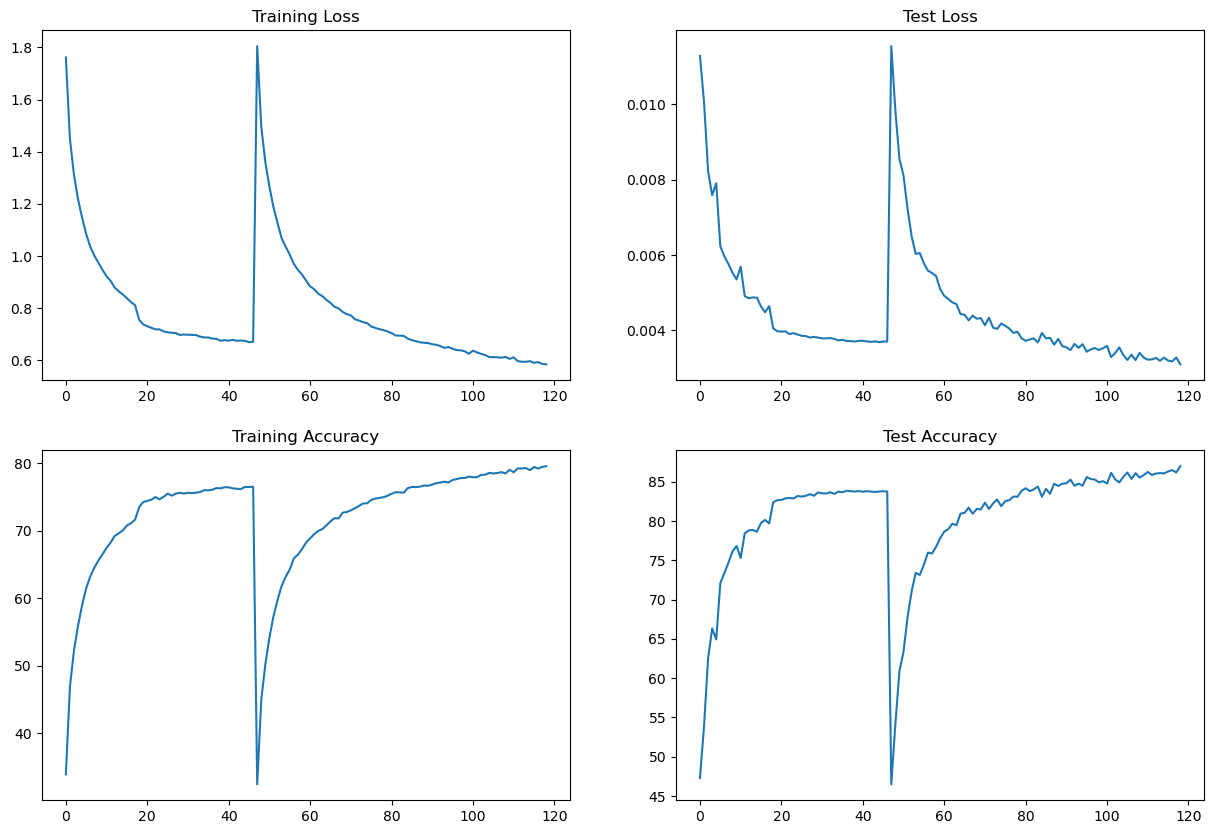

In [18]:
metrics = scores()
plot_metrics(metrics)

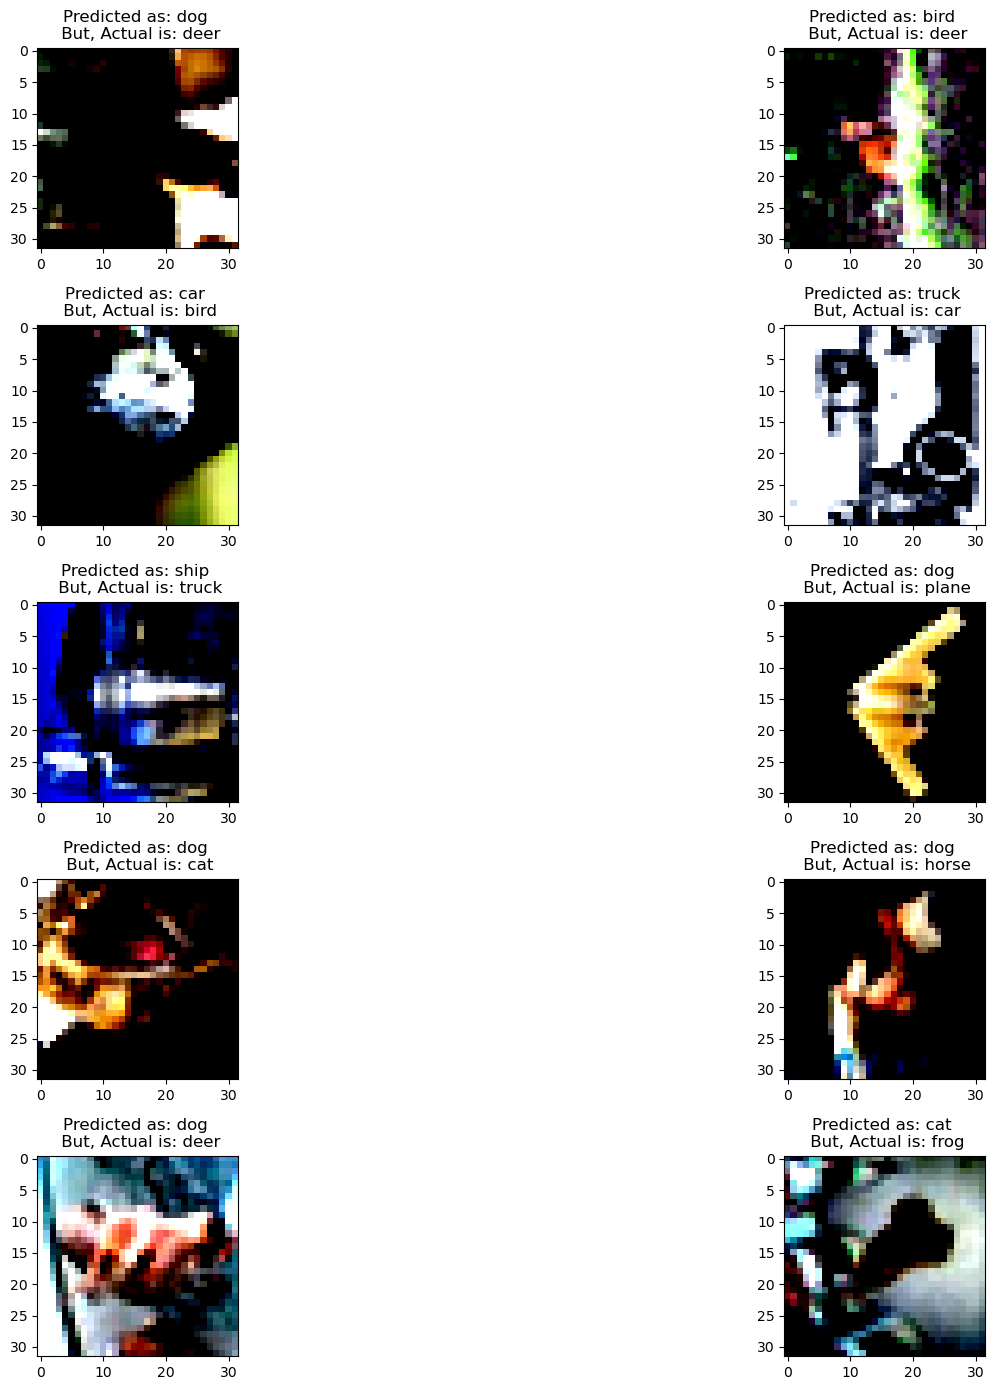

In [19]:

Plots((model,test_loader,device,10)).mis_classified()